In [1]:
#importing Libraries
from datetime import datetime
start =datetime.now()

import pandas as pd  #for Dataframe
import glob #for reading dataset files 

#Datapreprocessing part
print("Getting files..")
print("buisness type files")
buisness=(glob.glob("../data/buisness/*.txt"))

print("entertainment type files")

entertainment=(glob.glob("../data/entertainment/*.txt"))
print("politics type files")
politics=(glob.glob("../data/politics/*.txt"))

print("sport type files")
sport=(glob.glob("../data/sport/*.txt"))

print(" tech type files")
tech=(glob.glob("../data/tech/*.txt"))

#meta veriables for the Dataframe
category = []
file_name =[]
title = []
content = []


Getting files..
buisness type files
entertainment type files
politics type files
sport type files
 tech type files


In [2]:
def Create_Data(cate):
    #Filter
    
    print("Creating "+cate+" data...")
    if(cate is 'business'):
        field = buisness
    if(cate is 'entertainment'):
        field = entertainment
    if(cate is 'politics'):
        field = politics
    if(cate is 'sport'):
        field = sport
    if(cate is 'tech'):
        field = tech
    for textfile in field:
        try :
            with open(textfile) as f:
                rawcontentarray = f.read().splitlines()
                rawcontent = ""
                title.append(rawcontentarray[0])
                for i in range(2,len(rawcontentarray)):
                    rawcontent+=rawcontentarray[i]
                content.append(rawcontent)
                category.append(cate)
                file_name.append(textfile[textfile.rfind('/')+1:])
        except Exception as error:
            print("ERROR!")
            print(cate)
            print(rawcontentarray[0])
            print(textfile)
            print(rawcontent)
            print(file_name[-1])
            print(title[-1])
            print(content[-1])
            print(error)

Create_Data("business")
Create_Data("entertainment")
Create_Data("politics")
Create_Data("sport")
Create_Data("tech")

print("Cate\tFile\tTitle\tContent")
print(str(len(category))+"\t"+str(len(file_name))+"\t"+str(len(title))+"\t"+str(len(content)))

Creating business data...
Creating entertainment data...
Creating politics data...
Creating sport data...
ERROR!
sport
Mourinho expects fight to finish
../data/sport/199.txt
Chelsea manager Jose Mourinho expects the Champions League clash with Barcelona to be a fight to the finish.Mourinho is relishing the first leg of the tie against his former club in the last 16 in the Nou Camp. He said: "I wouldn't be surprised if nothing had been decided by the last minute of the return leg and the match had to go into extra time. "I have to defend what is mine and the Champions League is mine at the moment. I'm the last manager to have won it." Mourinho never coached Barcelona, assisting both Sir Bobby Robson and Louis van Gaal. But he is not envious, insisting: "I don't have to be jealous about Barcelona because they have 100 years of history and have won the European Cup once."I have been managing for five years and I have the same amount of Champions League trophies to my name." Barcelona star

In [3]:
#check extractedData
if (len(category)==len(file_name)==len(title)==len(content)):
    print("Data creation Successfull !")
else :
    print("Unsuccessfull data Creation !")
#import data to dataset
print("Importing Data ...")
dataSet=list(zip(category,file_name,title,content))
dataFrame=pd.DataFrame(data=dataSet,columns=['category','filename','title','content'])
print("Exporting Data")
dataFrame.to_csv('data.csv',index=False,header=True)
print("Done")

Data creation Successfull !
Importing Data ...
Exporting Data
Done


In [4]:
createdatetime=datetime.now()-start
dataFrame['category_id']=dataFrame['category'].factorize()[0]
category_id_dataFrame=dataFrame[['category','category_id']].drop_duplicates().sort_values('category_id')
category_to_id=dict(category_id_dataFrame.values)
id_to_categories=dict(category_id_dataFrame[['category_id','category']].values)


Data Exploration
---

In [5]:
dataFrame.sample(5,random_state=0)
dataFrame.groupby('category').filename.count().plot.bar(ylim=0)
dataFrame.head()

,category,filename,title,content,category_id
0,entertainment,288.txt,Rapper 50 Cent ends protege feud,Rapper 50 Cent has ended his public feud with ...,0
1,entertainment,230.txt,Aaliyah claim dismissed by court,Late R&B star Aaliyah's record company has fai...,0
2,entertainment,152.txt,"Beatles suits sell for $110,000",Four suits worn by the Beatles on their Please...,0
3,entertainment,326.txt,Oscars steer clear of controversy,The Oscars nominations list has left out some ...,0
4,entertainment,373.txt,British stars denied major Oscars,British hopes of winning major Oscars were das...,0


Data Preprocessing
---
in this part we convert the text of the documents to find Term Frequency , Inverse Document Frequency , abbreviated to tf-idf ; which will represent a words' importance in each document.

`sublinear_df` is set to `True` to use log form for frequency , to give diminishing returns as the frequency of a word increases.

`min_dif` is the min. numbers of documents a word must be present in to be kept , this is to avoid rare words 

`norm` is set to `12`

`encoding` is set to `latin-1` which is used in the training document.

`ngram_rage` is set to `(1,2)` to indicate that we want to consider both unigrams and bigrams or in other terms 

`stop_words` is set to `english` to remove all common pronouns and further reduce the number of noisy features.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer #will be used to calculate 'tf-idf' vector for each of our documents

tfidf=TfidfVectorizer(sublinear_tf=True,min_df=5,norm='l2',encoding='latin-1',ngram_range=(1,2),stop_words='english')

features=tfidf.fit_transform(dataFrame.content).toarray()
labels=dataFrame.category_id
features.shape

(1714, 11841)

In [7]:
from sklearn.feature_selection import chi2
import numpy as np

N=3
for category, category_id in sorted(category_to_id.items()):
    features_chi2=chi2(features,labels==category_id)
    indices=np.argsort(features_chi2[0])
    features_names=np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in features_names if len(v.split(' '))==1]
    bigrams = [v for v in features_names if len(v.split(' '))==2]
    print("# '{}':".format(category))
    print(" .Most correlated unigrams :\n     . {}".format('\n'.join(unigrams[-N:])))
    print(" .Most correlated unigrams :\n     . {}".format('\n'.join(bigrams[-N:])))

# 'entertainment':
 .Most correlated unigrams :
     . singer
actor
film
 .Most correlated unigrams :
     . film festival
los angeles
box office
# 'politics':
 .Most correlated unigrams :
     . government
election
labour
 .Most correlated unigrams :
     . tony blair
prime minister
mr blair
# 'sport':
 .Most correlated unigrams :
     . coach
match
cup
 .Most correlated unigrams :
     . grand slam
australian open
champions league
# 'tech':
 .Most correlated unigrams :
     . software
technology
users
 .Most correlated unigrams :
     . anti virus
mobile phones
mobile phone


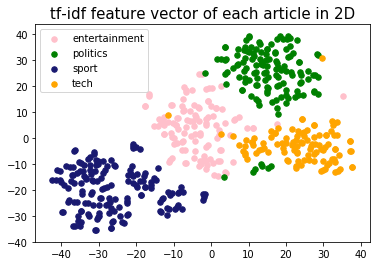

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Sample_SIZE=int(len(features)*0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)),size=Sample_SIZE,replace=False)
projected_features=TSNE(n_components=2,random_state=0).fit_transform(features[indices])
colors=['pink','green','midnightblue','orange','darkgrey']
for category,category_id in sorted(category_to_id.items()):
    points=projected_features[(labels[indices]==category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
    plt.title("tf-idf feature vector of each article in 2D",fontdict=dict(fontsize=15))
    plt.legend()


Test for the `Outliers`
---
`Arsenal` a sports club is in middle of the sport cluster

In [10]:
dataFrame[dataFrame.title.str.contains('Arsenal')]

,category,filename,title,content,category_id
900,sport,246.txt,Chelsea hold Arsenal,A gripping game between Arsenal and Chelsea en...,2
945,sport,163.txt,Arsenal through on penalties,Arsenal win 4-2 on penaltiesThe Spanish goalke...,2
1004,sport,157.txt,Wenger dejected as Arsenal slump,Arsenal manager Arsene Wenger claimed their di...,2
1018,sport,280.txt,Mourinho takes swipe at Arsenal,Chelsea boss Jose Mourinho has attempted to pi...,2
1053,sport,211.txt,Edu blasts Arsenal,Arsenal's Brazilian midfielder Edu has hit out...,2
1249,sport,268.txt,Campbell rescues Arsenal,Sol Campbell proved to be an unlikely match-wi...,2


## Model Training and Evaluation

### Metrices
First, it is vital to choose which metric to optimize. Accuracy  is the most commonly used metric .

### Choice of model
 we will benchmark the following three models:

- Logistic Regression: A linear classifier, mostly similar to traditional linear regression, but fitting the output of the logistic function.
- (Multinomial) Naive Bayes: A Bayesian model, assuming total independence between features. In our case, this means assuming that `P("football")` is unrelated to `P("stadium")`, which of course is a terrible assumption... and yet, this model still works surprisingly well with Bag of Words model, and were notably used for spam detection. 
- Random Forest: Random Forest (as the name might suggest) is the ensembling of a large number of decision trees, each trained on a random subset of the input features. They work well when complex feature-relations are involved, and are relatively robust to overfitting.

We usually also perform a **hyperparameter search** for each model: tuning each of its "knobs" (number of trees for Random Forest, penalty for Logistic Regression) until we find the optimal ones. For simplicity, we skip this step below and directly provide reasonably good parameters for each model.

### Model evaluation
One common mistake when evaluating a model is to train and test it on the same dataset: this is problematic because you this will not evaluate how well the model works in realistic conditions, on unseen data, and models that overfit to the data will seem to perform better. 

It is common practice to split the data in three parts:
1. A training set that the model will be trained on.
1. A validation set used for finding the optimal parameters (as discussed previously).
1. A test set to evaluate the model’s performance.

Since we are not performing a hyperparameter search, we will only use a train/test split.

To evaluate each model, we will use the K-fold cross-validation technique: iteratively training the model on different subsets of the data, and testing against the held-out data. scikit-learn provides a utility function, `cross_val_score`, that allows us to run this operation in a single line of code!


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_mod

model_name
LogisticRegression        0.988908
MultinomialNB             0.982490
RandomForestClassifier    0.796950
Name: accuracy, dtype: float64

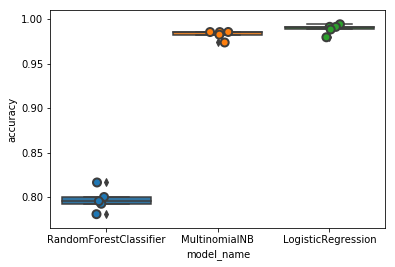

In [12]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
cv_df.groupby('model_name').accuracy.mean()

Here we can see accusracy of LogisticRegression > MultinomialNB >>RandomForestClassifier

/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted')

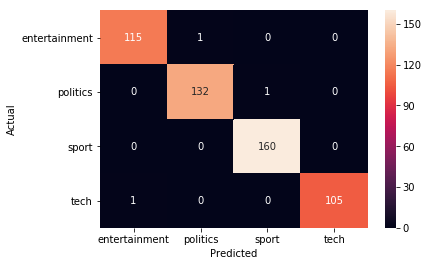

In [13]:
from sklearn.model_selection import train_test_split
model=LogisticRegression(random_state=0)
X_train,X_test,y_train,y_test,indices_train,indices_test=train_test_split(features,labels,dataFrame.index,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred_proba=model.predict_proba(X_test)
y_pred=model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=category_id_dataFrame.category.values,yticklabels=category_id_dataFrame.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


Crosschecking :

In [14]:
from IPython.display import display

for predicted in category_id_dataFrame.category_id:
    for actual in category_id_dataFrame.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            #print('')
            

In [15]:
model.fit(features, labels)

from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'entertainment':
  . Top unigrams:
       . film
       . singer
       . music
       . band
       . album
  . Top bigrams:
       . box office
       . los angeles
       . new york
       . film festival
       . ticket sales
# 'politics':
  . Top unigrams:
       . government
       . mr
       . labour
       . party
       . minister
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . club
       . match
       . cup
       . team
       . win
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . manchester united
       . world number
# 'tech':
  . Top unigrams:
       . technology
       . computer
       . users
       . software
       . online
  . Top bigrams:
       . said mr
       . news website
       . mobile phone
       . bbc news
       . mobile phones


/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/saphire/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
dataFrame[dataFrame.content.str.lower().str.contains('news website')].category.value_counts()

tech             69
politics          8
entertainment     7
Name: category, dtype: int64

# Finally Using the Model to predict a small snipet of news :

In [17]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_categories[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'sport'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'politics'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'

